# Elo analysis

Here is a notebook-friendly version of some Elo analysis. Adapted from `./elo.py`.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

plt.style.use("seaborn")
matplotlib.rcParams['figure.dpi']= 200

In [2]:
df = pd.read_csv("./nbaallelo.csv")
df["date_game"] = pd.to_datetime(df["date_game"])

# If you want to look past a specific date.
# df = df[df["date_game"] >= pd.Timestamp(2000, 1, 1)]

In [3]:
pts = df.groupby("gameorder")["pts"].sum()

In [5]:
home = df[df.game_location == "H"]
away = df[df.game_location == "A"]

# Neutral games can't be split into home and away.
# Ignore these for now, but think about how to deal with them
# later.
neutral = df.drop(home.index).drop(away.index)

home = home.set_index("gameorder")
away = away.set_index("gameorder")

In [6]:
elo_sum = home["elo_i"] + away["elo_i"]
elo_diff = abs(home["elo_i"] - away["elo_i"])
elo_df = pd.DataFrame({"pts": pts, "elo_sum": elo_sum, "elo_diff": elo_diff})

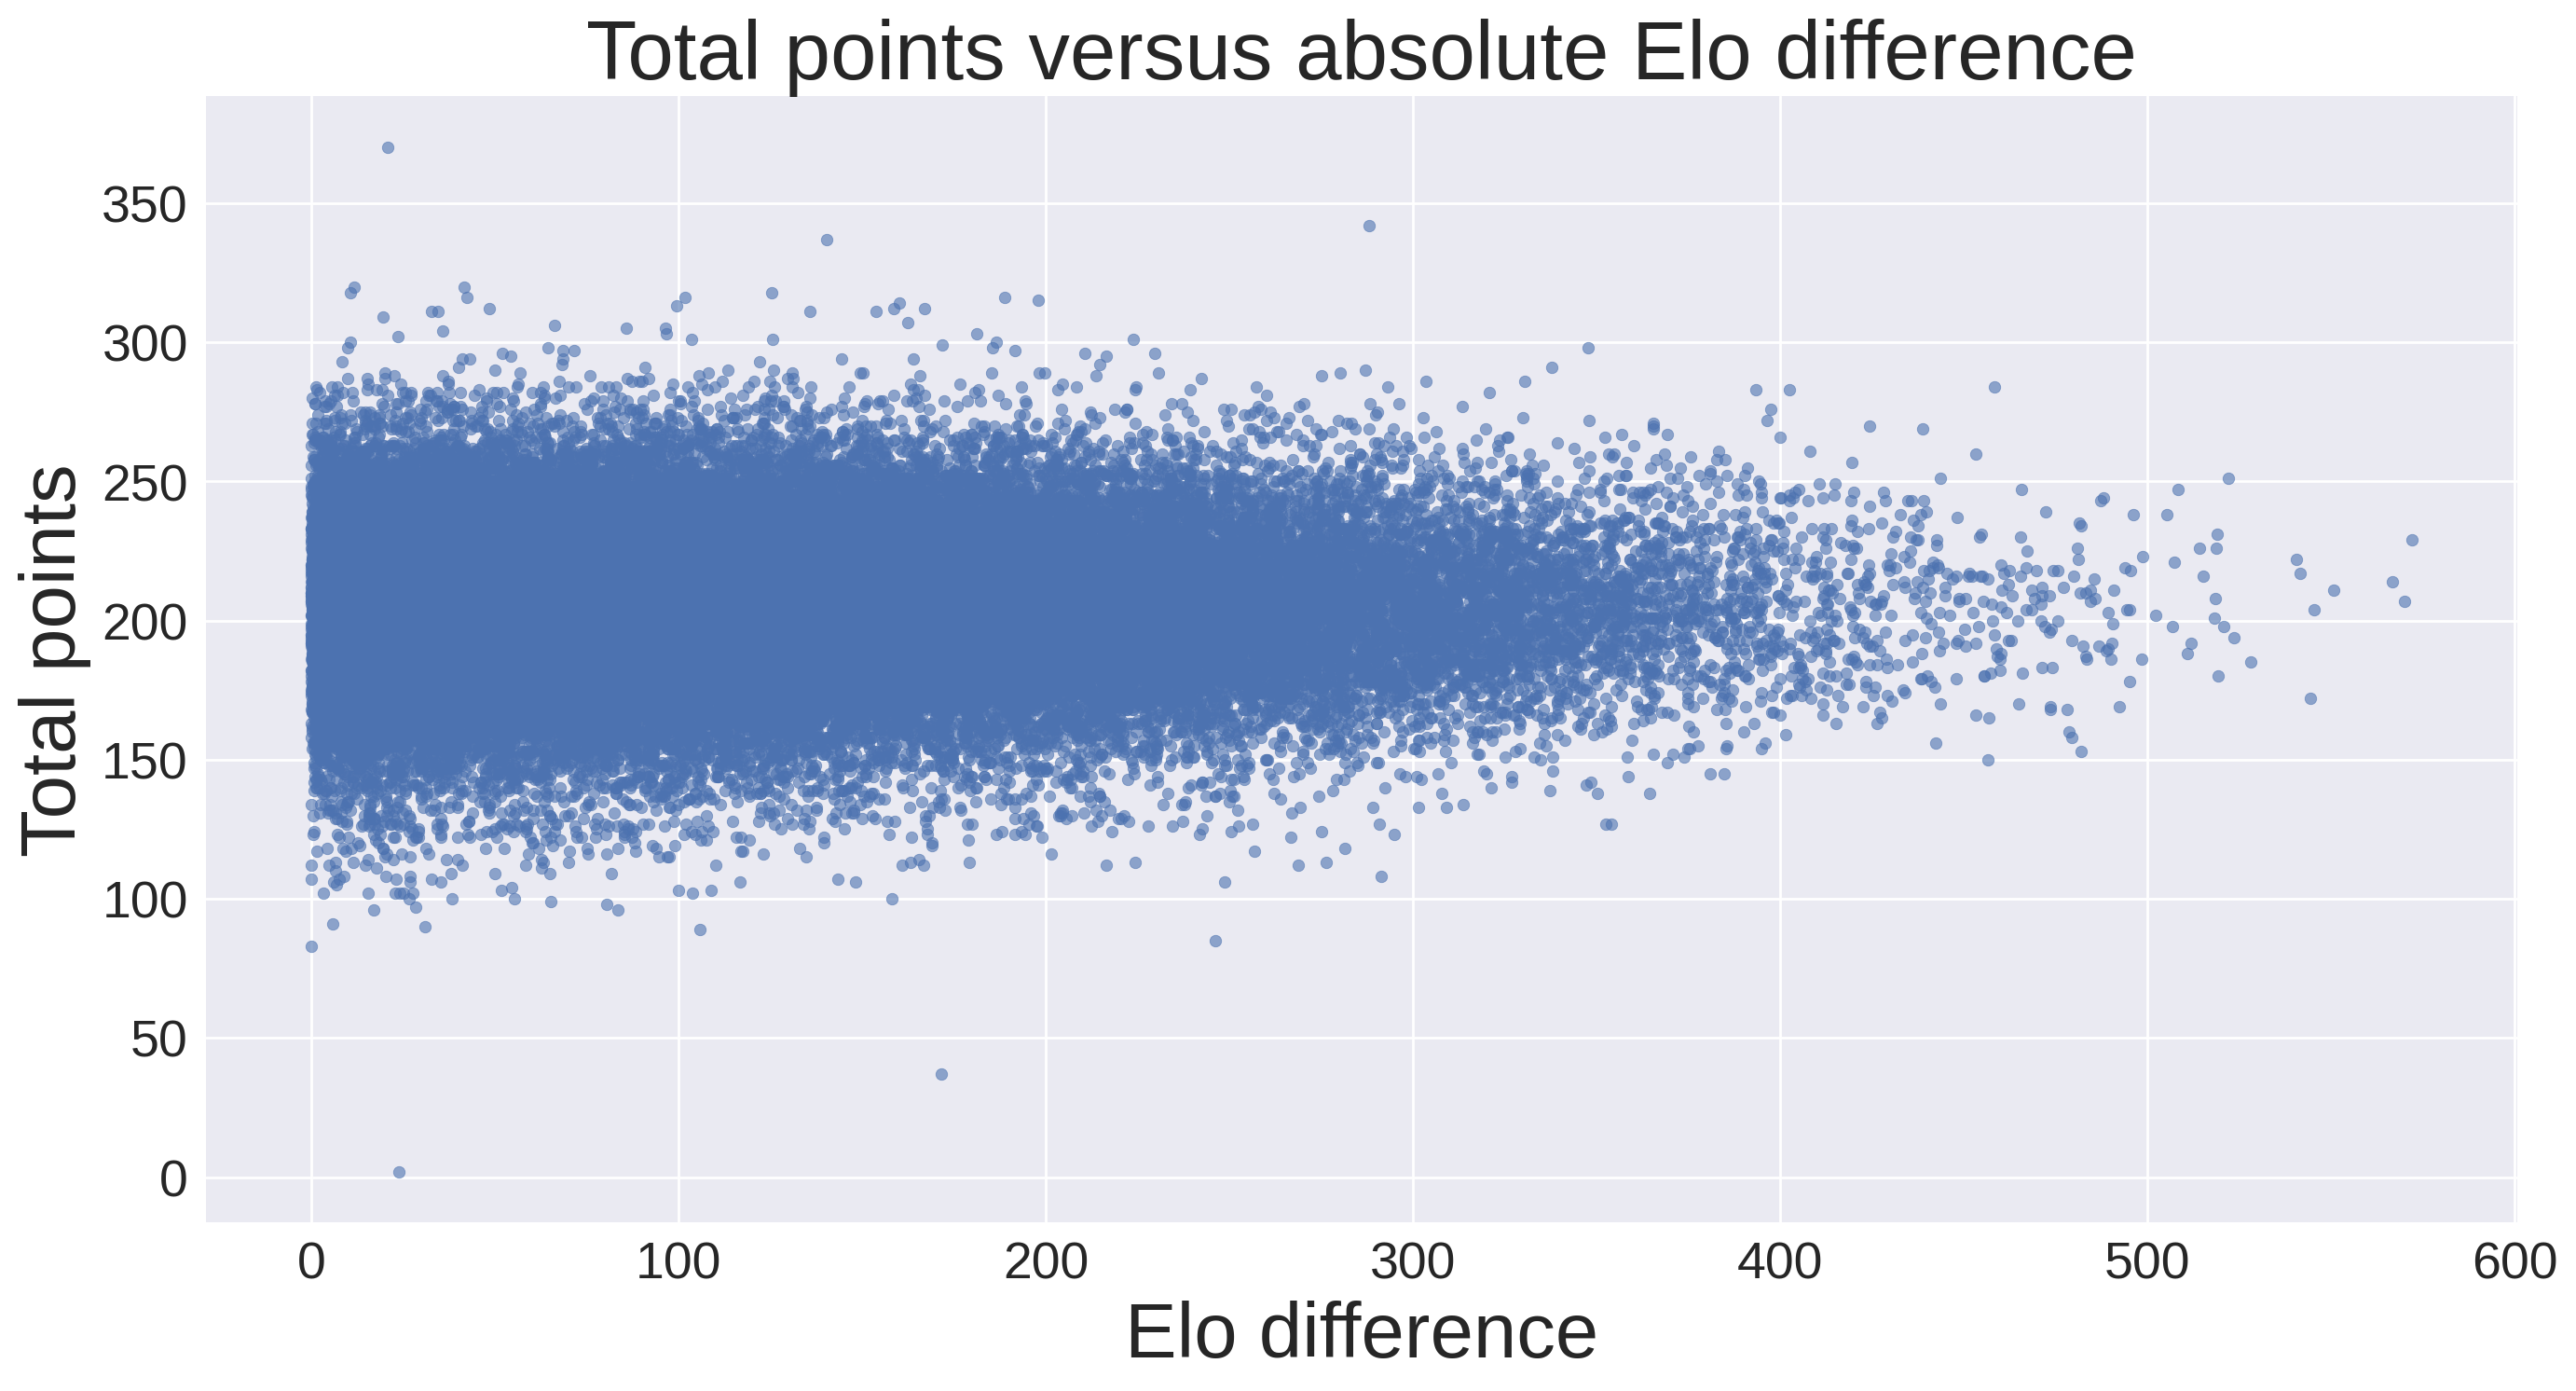

In [23]:
# Even with low alpha, still pretty "full."

plt.figure(figsize=(16, 8))
elo_df.plot.scatter(x="elo_diff", y="pts", alpha=0.6, ax=plt.gca())
plt.xlabel("Elo difference", fontsize=30)
plt.ylabel("Total points", fontsize=30)
plt.title("Total points versus absolute Elo difference", fontsize=32)
plt.gca().tick_params(axis='both', which='major', labelsize=20)
plt.gca().tick_params(axis='both', which='minor', labelsize=20)
plt.show()

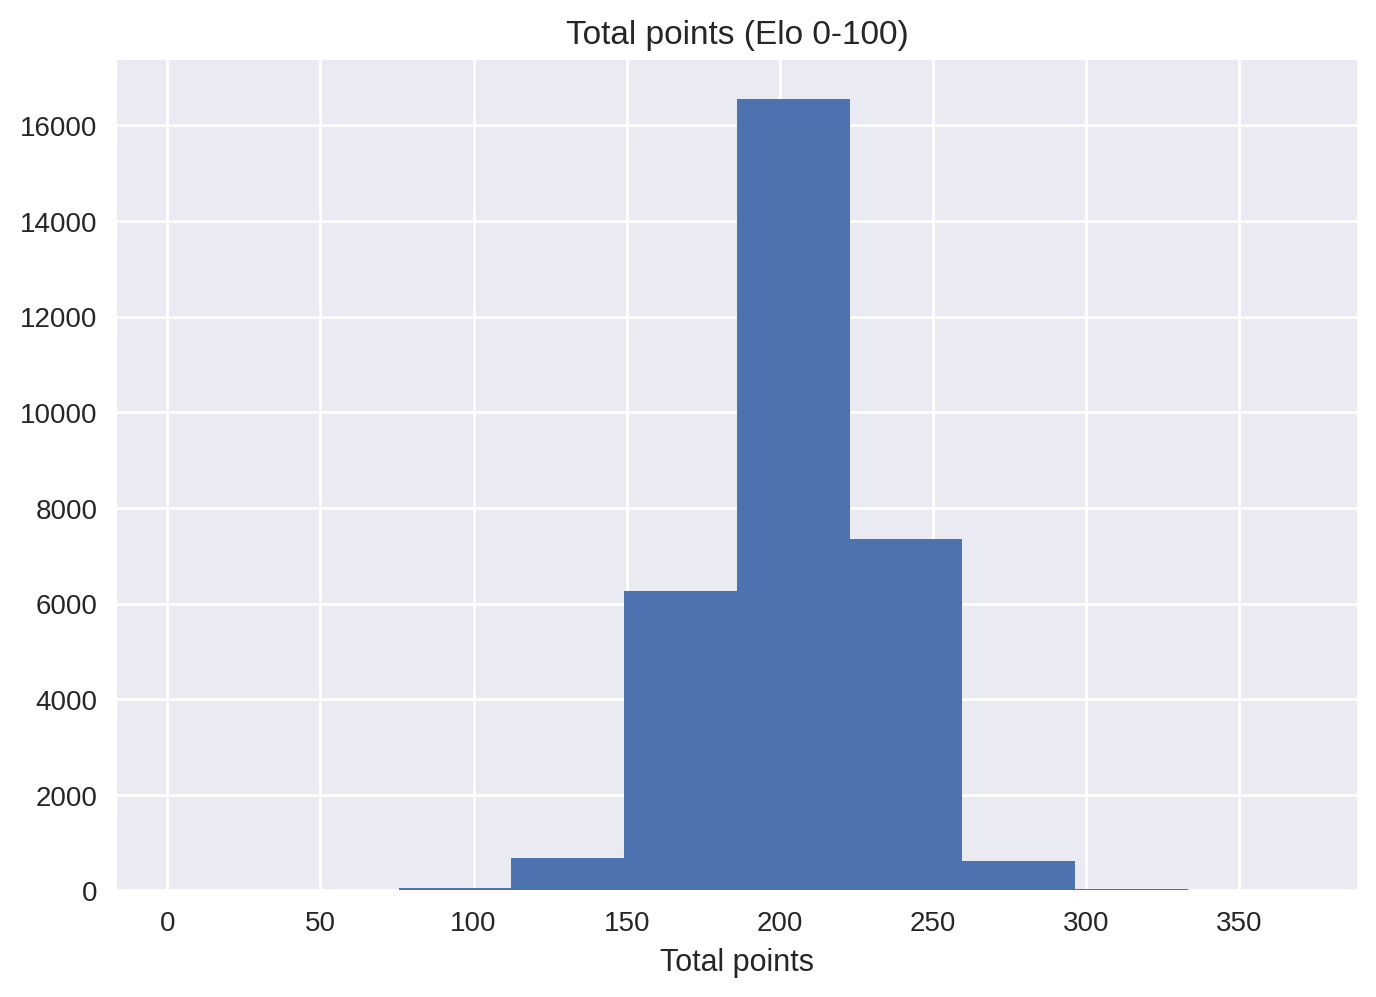

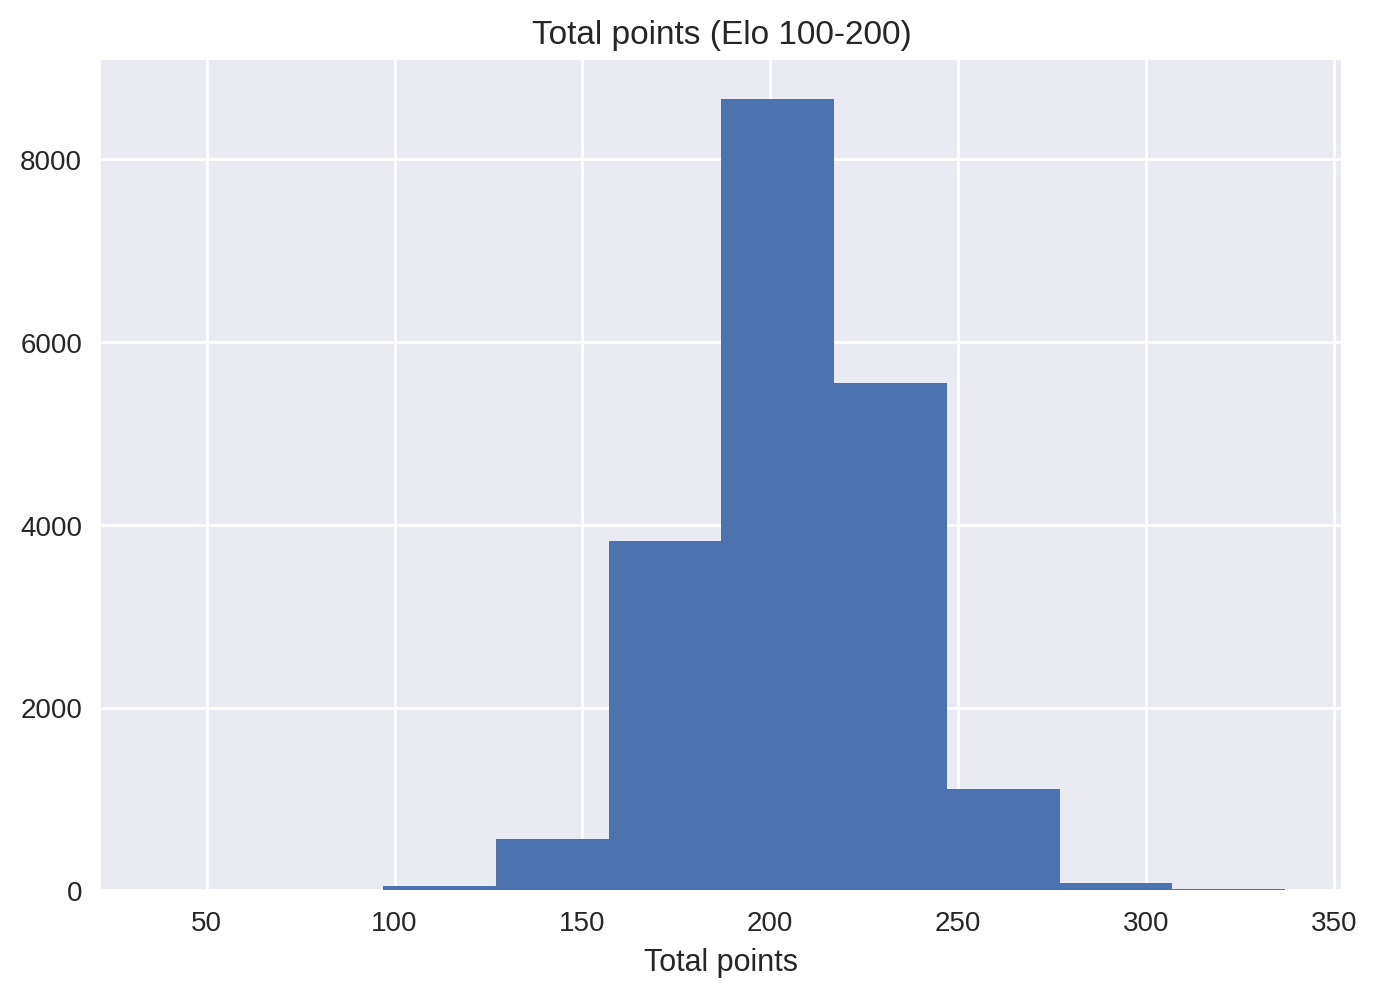

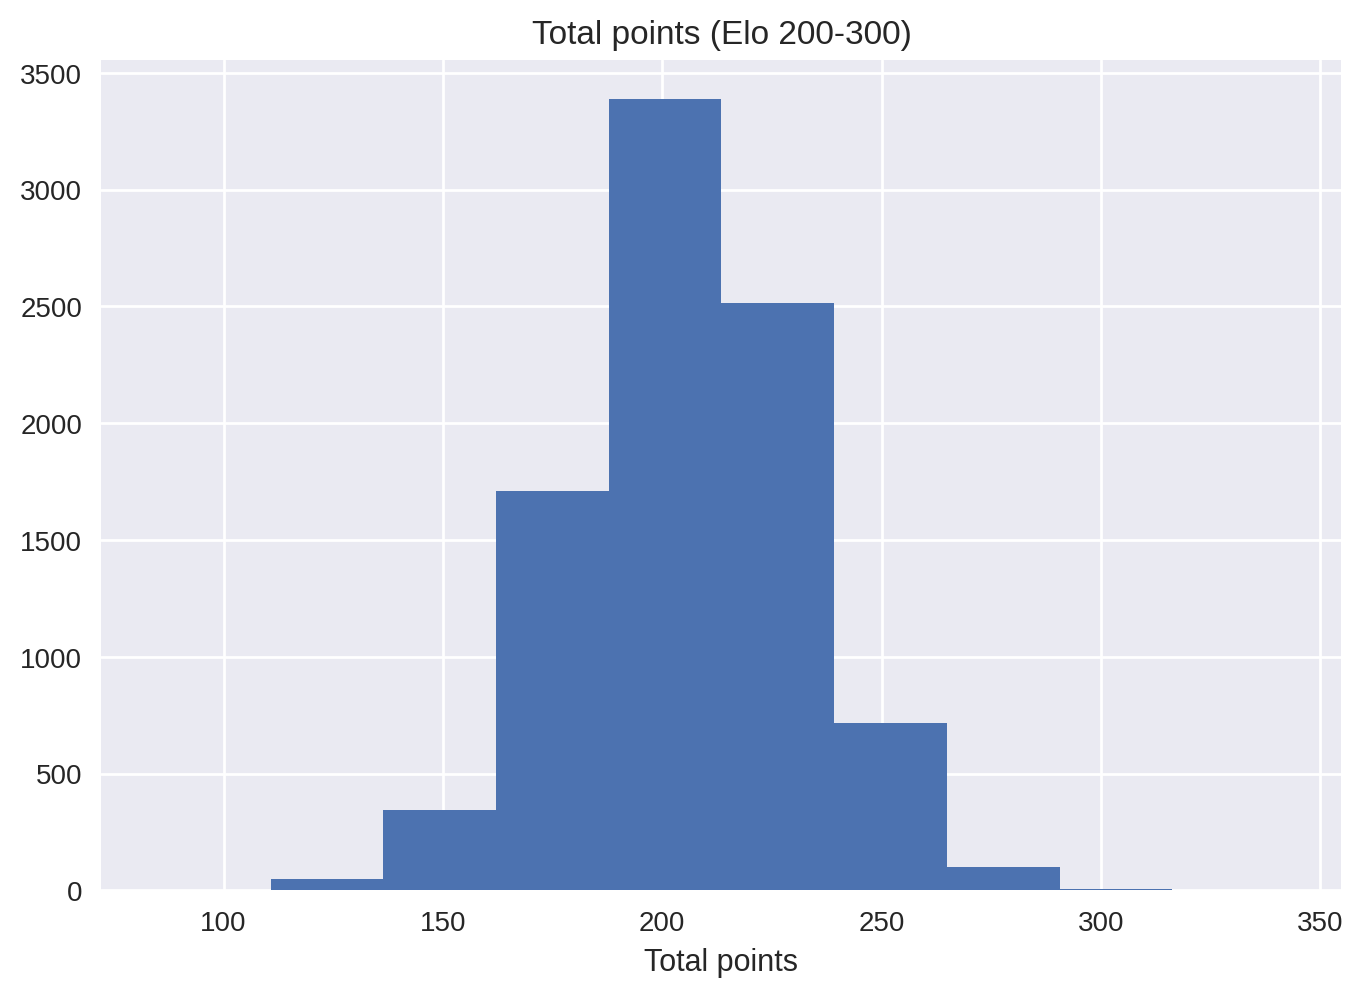

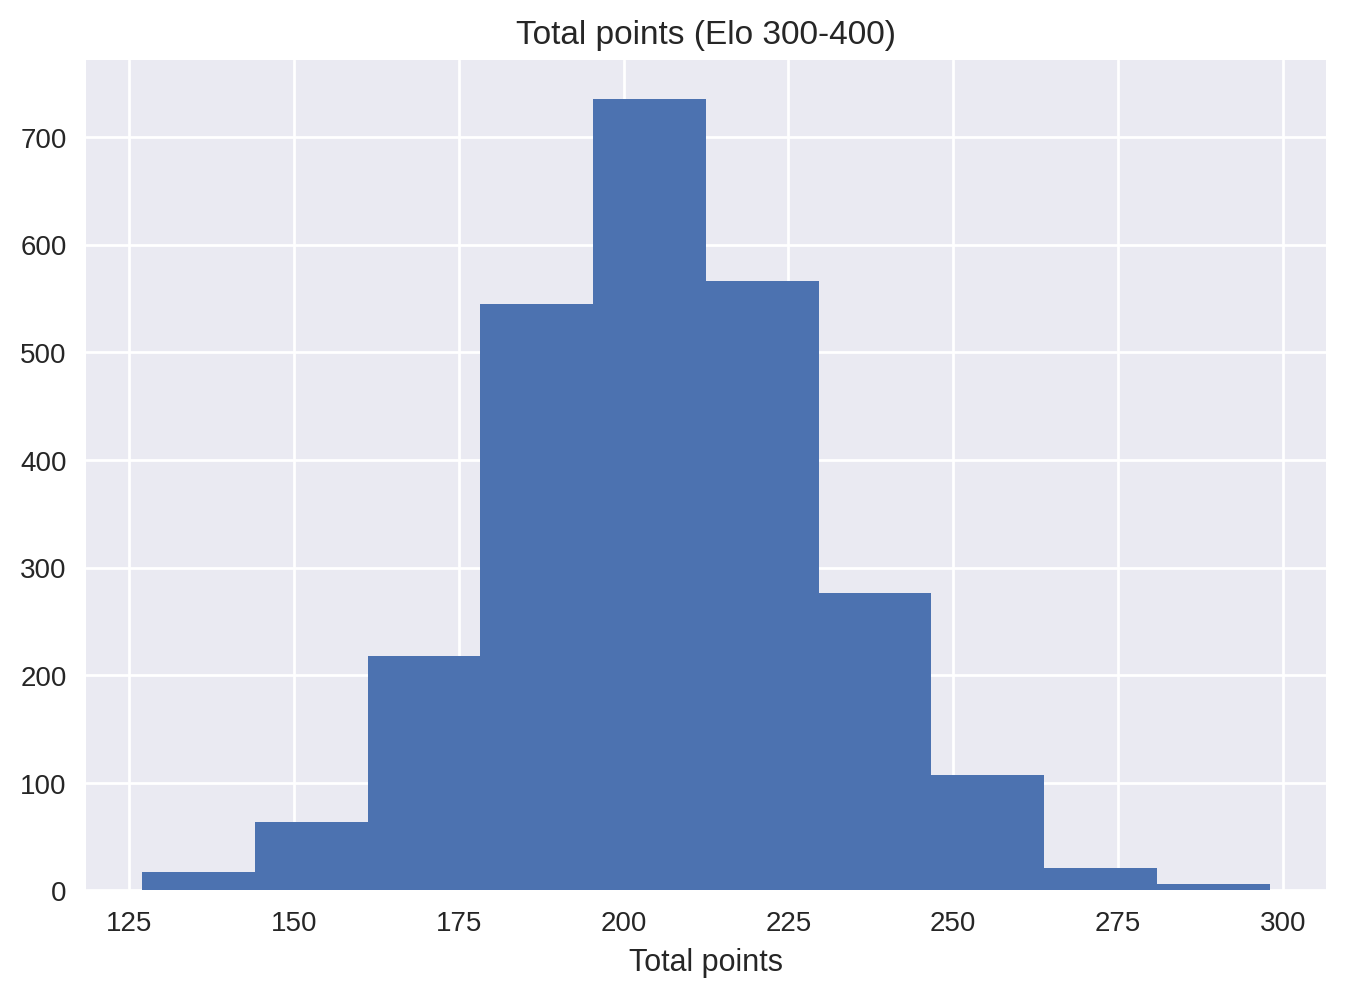

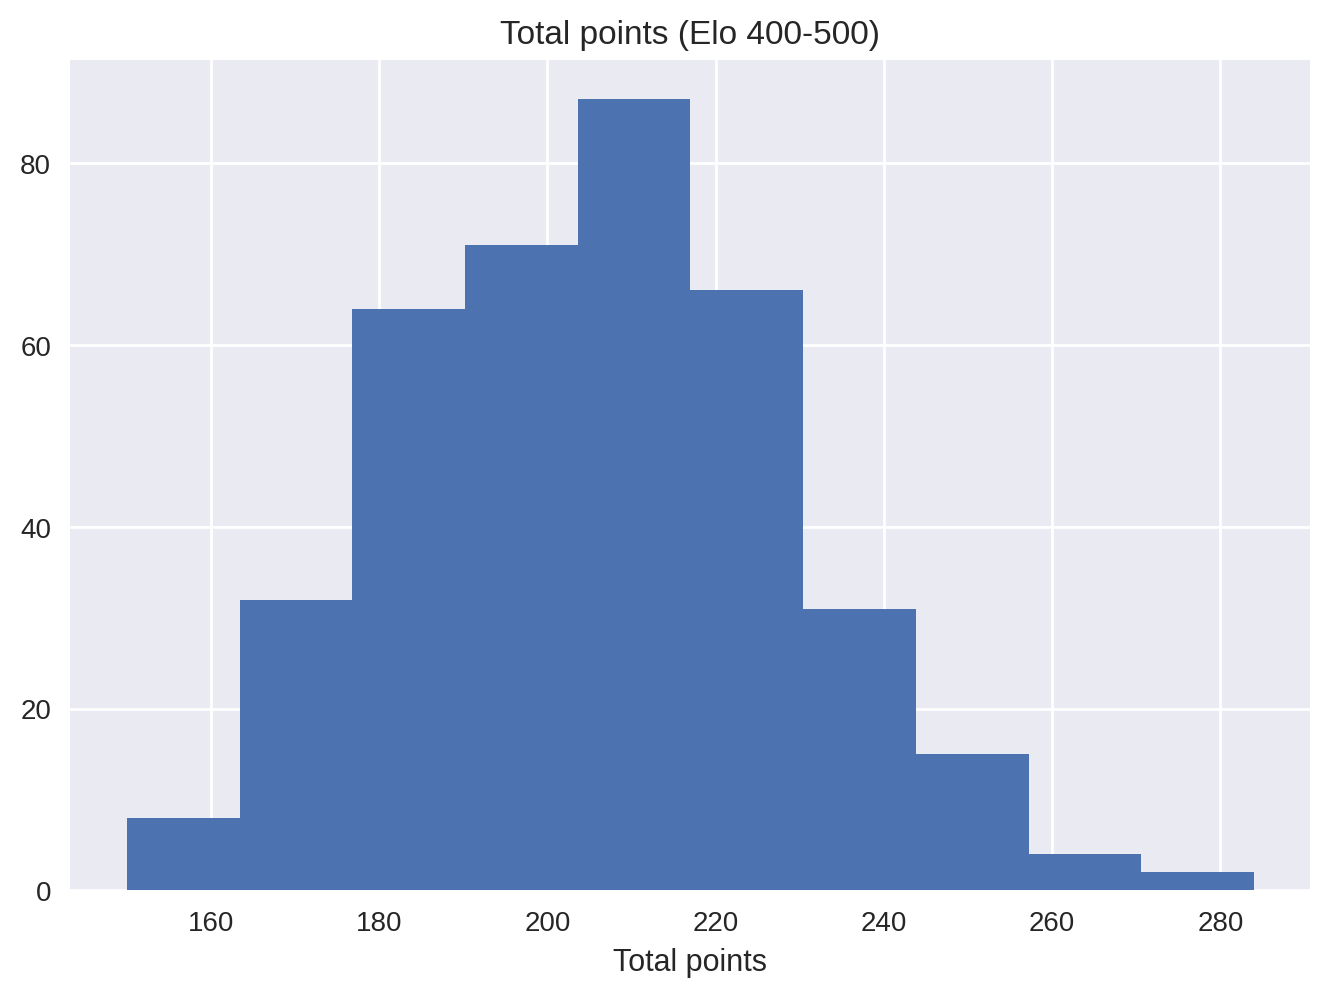

In [25]:
# Block histograms.

step = 100
for base_elo in range(0, 500, step):
    block = elo_df[(base_elo <= elo_df["elo_diff"]) &
                    (elo_df["elo_diff"] < base_elo + step)]
    plt.figure()
    block["pts"].hist()
    plt.xlabel("Total points")
    plt.title("Total points (Elo {}-{})".format(base_elo, base_elo + step))

plt.show()